# Paper Recreation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [3]:
PATH = "../datasets/tradhist.csv"

In [4]:
df = pd.read_csv(PATH)

/var/folders/qc/xp9q1kcj79315fgc2jdgwtv00000gn/T/ipykernel_82774/3758478907.py:1: DtypeWarning: Columns (8,12,14,21,24,28,33,45,46,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH)


In [5]:
features = ["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig", "OECD_o", "OECD_d",
              "GATT_o", "GATT_d", "XPTOT_o", "year", "FLOW"]

In [6]:
df = df[features]

Dropping all years below 2009 and FLOW < 100GBP

In [7]:
cleaned_df = df.loc[(df["year"] > 2008) & (df["FLOW"] > 100)].dropna()

In [8]:
cleaned_df.shape

(129557, 14)

Applying log transforms to obtain a smoother distribution of data

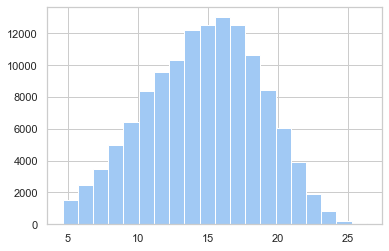

In [24]:
plt.hist(np.log(cleaned_df["FLOW"]), bins=20)
plt.show()

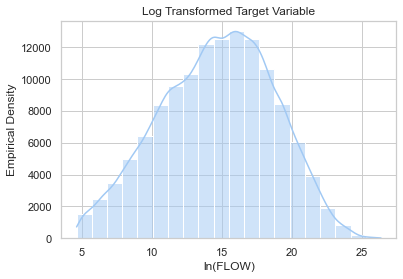

In [29]:
sns.histplot(data=np.log(cleaned_df["FLOW"]), kde=True, bins=20)
#sns.set(title="Log Transformed Target Variable", xlabel="ln(FLOW)", ylabel="Density")
plt.xlabel("ln(FLOW)")
plt.ylabel("Empirical Density")
plt.title("Log Transformed Target Variable")
plt.show()

(array([  131.,   679.,  6580.,  9980., 25124., 28313., 25348., 18928.,
        11434.,  3040.]),
 array([16.67179086, 18.00435223, 19.33691359, 20.66947496, 22.00203632,
        23.33459769, 24.66715906, 25.99972042, 27.33228179, 28.66484315,
        29.99740452]),
 <BarContainer object of 10 artists>)

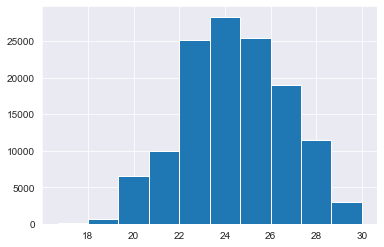

In [9]:
plt.hist(np.log(cleaned_df["GDP_d"]))

In [10]:
cleaned_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,year,FLOW
1707,1.613070e+09,1.119100e+10,101.936,28809.168,13168.223762,0.0,0.0,0.0,0.0,0.0,0.0,2.671829e+09,2011,60232.73
1839,1.604113e+09,1.627569e+11,101.416,7705.423,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,2009,11195.58
1841,1.613070e+09,2.175294e+11,101.936,8734.722,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,2.671829e+09,2011,113576.80
1874,1.604113e+09,2.417646e+11,101.416,40798.640,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,2009,894681.06
1875,1.597046e+09,2.987639e+11,101.597,41222.875,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.848131e+08,2010,166.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,6.097825e+09,1.311544e+10,13973.897,13917.439,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.070475e+09,2010,46558256.00
2502423,6.838230e+09,1.464204e+10,14255.592,14343.526,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.192061e+09,2011,55171376.00
2502424,7.845171e+09,1.614464e+10,14565.482,14786.581,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.457760e+09,2012,58787336.00
2502425,8.629172e+09,1.793963e+10,14898.092,15246.086,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.243481e+09,2013,77869780.00


In [11]:
transformed_df = np.log(cleaned_df[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "XPTOT_o", "FLOW"]])

In [12]:
remaining_df = cleaned_df[["Comlang", "Contig", "OECD_o", "OECD_d",
                           "GATT_o", "GATT_d", "year"]]

In [13]:
remaining_df

,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,year
1707,0.0,0.0,0.0,0.0,0.0,0.0,2011
1839,0.0,0.0,0.0,0.0,0.0,1.0,2009
1841,0.0,0.0,0.0,0.0,0.0,1.0,2011
1874,0.0,0.0,0.0,0.0,0.0,1.0,2009
1875,0.0,0.0,0.0,0.0,0.0,1.0,2010
...,...,...,...,...,...,...,...
2502422,1.0,1.0,0.0,0.0,1.0,1.0,2010
2502423,1.0,1.0,0.0,0.0,1.0,1.0,2011
2502424,1.0,1.0,0.0,0.0,1.0,1.0,2012
2502425,1.0,1.0,0.0,0.0,1.0,1.0,2013


In [14]:
transformed_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,XPTOT_o,FLOW
1707,21.201405,23.138376,4.624345,10.268449,9.485562,21.706029,11.005971
1839,21.195837,25.815523,4.619231,8.949680,9.455095,21.033409,9.323274
1841,21.201405,26.105600,4.624345,9.075061,9.455095,21.706029,11.640235
1874,21.195837,26.211230,4.619231,10.616404,8.554063,21.033409,13.704223
1875,21.191422,26.422919,4.621014,10.626749,8.554063,19.034855,5.117814
...,...,...,...,...,...,...,...
2502422,22.531198,23.297056,9.544946,9.540898,6.369551,21.451044,17.656215
2502423,22.645795,23.407163,9.564905,9.571054,6.369551,21.508108,17.825955
2502424,22.783164,23.504854,9.586410,9.601475,6.369551,21.622516,17.889437
2502425,22.878414,23.610278,9.608988,9.632078,6.369551,21.531294,18.170549


In [15]:
final_df = pd.merge(transformed_df, remaining_df, left_index=True, right_index=True)

In [16]:
final_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,XPTOT_o,FLOW,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,year
1707,21.201405,23.138376,4.624345,10.268449,9.485562,21.706029,11.005971,0.0,0.0,0.0,0.0,0.0,0.0,2011
1839,21.195837,25.815523,4.619231,8.949680,9.455095,21.033409,9.323274,0.0,0.0,0.0,0.0,0.0,1.0,2009
1841,21.201405,26.105600,4.624345,9.075061,9.455095,21.706029,11.640235,0.0,0.0,0.0,0.0,0.0,1.0,2011
1874,21.195837,26.211230,4.619231,10.616404,8.554063,21.033409,13.704223,0.0,0.0,0.0,0.0,0.0,1.0,2009
1875,21.191422,26.422919,4.621014,10.626749,8.554063,19.034855,5.117814,0.0,0.0,0.0,0.0,0.0,1.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,22.531198,23.297056,9.544946,9.540898,6.369551,21.451044,17.656215,1.0,1.0,0.0,0.0,1.0,1.0,2010
2502423,22.645795,23.407163,9.564905,9.571054,6.369551,21.508108,17.825955,1.0,1.0,0.0,0.0,1.0,1.0,2011
2502424,22.783164,23.504854,9.586410,9.601475,6.369551,21.622516,17.889437,1.0,1.0,0.0,0.0,1.0,1.0,2012
2502425,22.878414,23.610278,9.608988,9.632078,6.369551,21.531294,18.170549,1.0,1.0,0.0,0.0,1.0,1.0,2013


In [17]:
from sklearn.model_selection import train_test_split

final_df = final_df.drop(["year"], axis=1)

In [18]:
final_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,XPTOT_o,FLOW,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d
1707,21.201405,23.138376,4.624345,10.268449,9.485562,21.706029,11.005971,0.0,0.0,0.0,0.0,0.0,0.0
1839,21.195837,25.815523,4.619231,8.949680,9.455095,21.033409,9.323274,0.0,0.0,0.0,0.0,0.0,1.0
1841,21.201405,26.105600,4.624345,9.075061,9.455095,21.706029,11.640235,0.0,0.0,0.0,0.0,0.0,1.0
1874,21.195837,26.211230,4.619231,10.616404,8.554063,21.033409,13.704223,0.0,0.0,0.0,0.0,0.0,1.0
1875,21.191422,26.422919,4.621014,10.626749,8.554063,19.034855,5.117814,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,22.531198,23.297056,9.544946,9.540898,6.369551,21.451044,17.656215,1.0,1.0,0.0,0.0,1.0,1.0
2502423,22.645795,23.407163,9.564905,9.571054,6.369551,21.508108,17.825955,1.0,1.0,0.0,0.0,1.0,1.0
2502424,22.783164,23.504854,9.586410,9.601475,6.369551,21.622516,17.889437,1.0,1.0,0.0,0.0,1.0,1.0
2502425,22.878414,23.610278,9.608988,9.632078,6.369551,21.531294,18.170549,1.0,1.0,0.0,0.0,1.0,1.0


In [19]:
X = final_df[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig", "OECD_o", "OECD_d","GATT_o", "GATT_d", "XPTOT_o"]]

y = final_df[["FLOW"]]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
lr.score(X_test, y_test)

0.6535032103895009

In [23]:
from sklearn.svm import SVR

svm_reg = SVR()

In [24]:
np.reshape(y_train, (y_train.shape[0], )).shape

(90689, 1)

In [26]:
svm_reg.fit(X_train, y_train.values.ravel())

SVR()

In [27]:
svm_reg.score(X_test, y_test)

0.670406562317613